# HVC Snapshot Preperation Stage

## Step 1: establish which HVC we want to look at + setup

In [1]:
# Collate data
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator
import numpy as np

collated_data_masked_HVCs = collator.data_whole_sky(False, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")
collated_data_large_HVCs = collator.data_whole_sky(False, hvc_area_range=(np.pi, 50), load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")
collated_data_all_HVCs = collator.data_whole_sky(False, full_hvc_range=True, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [2]:
# Display the HVC masked table

collated_data_masked_HVCs["HVCs"]

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G001.2-15.4-185,"283.26028447412233,-34.88611707131728",18 53 02.47,-34 53 10,-185.8,1.0,-181.2,-138.3,21.4,1.36,6e+19,2e+18,1.1,1.0,1.3,H1,CHVC 001.2-15.5-186,"GCN_GCN,N",Simbad,8,GHVC
G002.1-43.1-126,"317.81553732294526,-40.06667225172776",21 11 15.73,-40 04 00,-126.2,1.0,-120.0,-88.7,12.4,2.29,7e+19,1e+18,2.0,1.9,3.1,"T,H5",HVC 002.3-43.1-118,N,Simbad,21,GHVC
G003.9-36.8-137,"309.8759115687047,-38.218616973946475",20 39 30.22,-38 13 07,-137.2,1.0,-125.1,-99.7,24.1,0.90,4e+19,2e+18,1.9,4.3,2.4,H3,HVC 004.1-36.3-130,N,Simbad,38,GHVC
G005.2-33.0-128,"305.341411145527,-36.490005971303596",20 21 21.94,-36 29 24,-128.5,1.5,-111.5,-91.0,28.5,0.53,3e+19,3e+18,1.1,3.1,1.8,H2,HVC 005.6-32.9-120,N,Simbad,47,GHVC
G005.9-32.4-110,"304.7617860811444,-35.80695042693013",20 19 02.83,-35 48 25,-110.6,2.7,-91.3,-73.1,31.2,0.31,4e+18,3e+18,2.9,2.6,3.5,H1,HVC 006.4-31.5-088,N,Simbad,60,GHVC
G011.4-67.7-157,"347.9989551483094,-33.05028139969578",23 11 59.75,-33 03 01,-157.6,1.0,-141.0,-125.1,24.7,0.80,4e+19,2e+18,1.2,2.5,0.9,"T,H1",CHVC 011.6-67.7-155,"N,MS_MS",Simbad,110,GHVC
G015.7-14.6-219,"288.728035058528,-21.75250604671004",19 14 54.73,-21 45 09,-219.6,1.7,-162.0,-177.1,18.9,0.30,1e+19,2e+18,1.3,3.2,2.4,H2,HVC 015.9-14.3-222,"GCN_GCN,EN,N",Simbad,144,GHVC
G020.0-18.3-242,"294.0889102874738,-19.36083941143664",19 36 21.34,-19 21 39,-242.1,1.0,-170.5,-199.6,7.8,0.54,1e+19,8e+17,1.1,1.8,1.5,H1,HVC 020.1-18.1-242,"GCN_GCN,EN",Simbad,176,GHVC


In [3]:
# We aim to analyse all of the HVCs of a particular area, so we go by index

# Specific HVC

index = 115 #59 or 60
#selected_HVC = collated_data_masked_HVCs["HVCs"][collated_data_masked_HVCs["HVCs"]["Name"]=="G254.9+39.7+094"][0]
selected_HVC = collated_data_masked_HVCs["HVCs"][index]#example_HVC#
selected_HVC

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G304.6-36.9+111,"5.069442893489696,-80.02833536277285",00 20 16.66,-80 01 42,111.9,1.0,-32.7,74.4,21.3,1.32,5e+19,2e+18,1.4,1.3,2.3,"T,H1",CHVC 304.6-37.3+111,"P,MS_MS",Simbad,1198,GHVC


## Step 2: Determine field corners

In [20]:
from astropy.coordinates import SkyCoord
from astropy import units as u

dx = selected_HVC['dx']
dy = selected_HVC['dy']

# Twice the area of the HVC to ensure it's including all of the HVC
di = max(dx, dy) * u.deg

centre_coord = selected_HVC['SkyCoord'].galactic

# Only check for overflows as di will always be positive
#new_dec = centre_coord.l + di
#if new_dec.value > 90:
#    new_dec = 180 * u.deg - new_dec # This covers obtuse/reflex angles up to 360 degrees

# Calculate upper corner coordinate
new_coord = SkyCoord(centre_coord.l+di, centre_coord.b+di, frame='galactic')#SkyCoord((centre_coord.+di), new_dec, frame='galactic')
new_coord2 = SkyCoord(centre_coord.l-di, centre_coord.b-di, frame='galactic')

# Only check for underflows as di will always be positive
#new_dec = centre_coord.dec - di*2
#if new_dec.value < -90:
#    new_dec = - (180 * u.deg + new_dec) # This covers obtuse/reflex angles up to -360 degrees

# Calculate lower corner coordinate
#new_coord = SkyCoord((centre_coord.ra-di*2), new_dec, frame='icrs')

# IMPORTANT: The upper corner may not have values greater. This cannot be shortcut by swapping coordinates around, and must be accounted for
print(new_coord2, new_coord, centre_coord)

<SkyCoord (Galactic): (l, b) in deg
    (302.31596529, -39.29781778)> <SkyCoord (Galactic): (l, b) in deg
    (306.9159652, -34.69781787)> <SkyCoord (Galactic): (l, b) in deg
    (304.61596525, -36.99781782)>


If the HVC is on the corner of the sky, then don't analyse it.

In [5]:
if centre_coord.l > new_coord.l or centre_coord.b > new_coord.b:
    print("DON'T ANALYSE")

## Step 3: Crop images

Assume that the corners are accurate for the time being.

[638, 662] [693, 607] [665, 635]


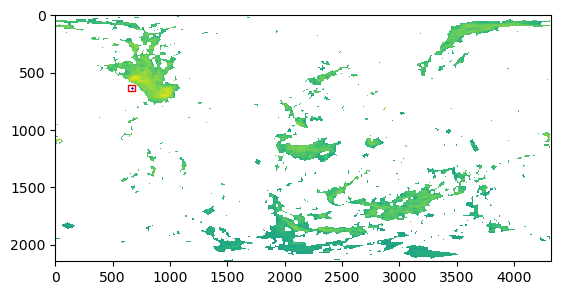

In [6]:
from astropy.wcs import WCS
from wcs import image_transform as it

wcs = WCS(collated_data_masked_HVCs["HI"].header)
pix_down = list(np.array(list(map(int, it.get_pixel(wcs, new_coord2))))-1)
pix_up = list(np.array(list(map(int, it.get_pixel(wcs, new_coord))))-1)
pix_c = list(np.array(list(map(int, it.get_pixel(wcs, centre_coord))))-1)
print(pix_up, pix_down, pix_c)

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

plt.imshow(collated_data_masked_HVCs["HI"].data)

plt.gca().add_patch(Rectangle(
    (pix_up[0], pix_down[1]),
    np.abs(pix_up[0]-pix_down[0]),
    np.abs(pix_up[1]-pix_down[1]),
    linewidth=1,edgecolor='r',facecolor='none'
    ))
plt.plot(*pix_c, 'bx', ms=1)
plt.show()

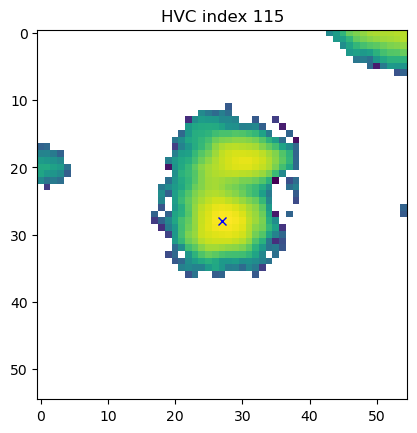

In [7]:
def crop_img_1d(img, pixel_up, pixel_down):
    img = img[pixel_down[1]:pixel_up[1]]
    return img

def crop_img(img, pixel_up, pixel_down):
    img = img[pixel_down[1]:pixel_up[1]] if pixel_down[1]<pixel_up[1] else img[pixel_up[1]:pixel_down[1]]
    img = np.transpose(img)
    img = img[pixel_down[0]:pixel_up[0]] if pixel_down[0]<pixel_up[0] else img[pixel_up[0]:pixel_down[0]]
    img = np.transpose(img)
    return img



plt.imshow(crop_img(collated_data_masked_HVCs["HI"].data, pix_up, pix_down))
plt.plot((pix_c[0]-pix_up[0]),(pix_c[1]-pix_down[1]), 'bx')
plt.title("HVC index "+str(index))
plt.show()

Testing the implemented function:

[638, 662]
[693, 607]


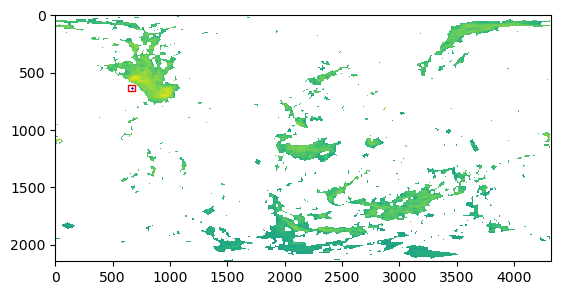

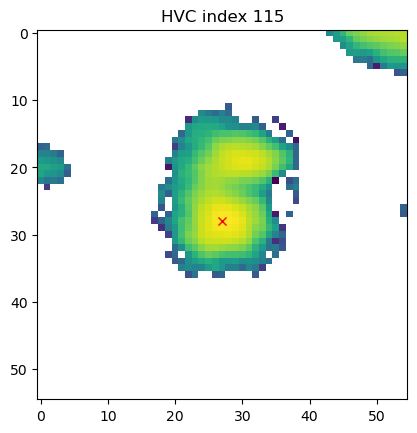

array([[      nan,       nan,       nan, ..., 19.276733, 19.30464 ,
        19.323727],
       [      nan,       nan,       nan, ..., 19.207214, 19.24474 ,
        19.298592],
       [      nan,       nan,       nan, ..., 18.99824 , 19.034306,
        19.11333 ],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [8]:
from collation import hvc_snapshot as snap
snap.crop_wcs([new_coord2, new_coord, centre_coord], collated_data_masked_HVCs["HI"], True, index)

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


[5593, 1326]
[5703, 1216]


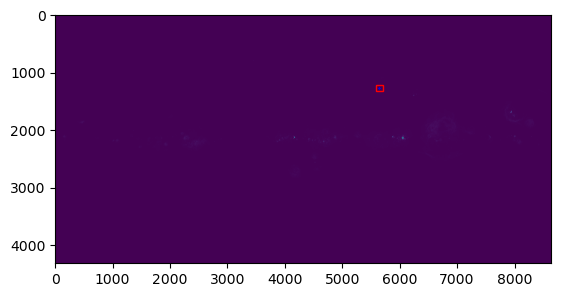

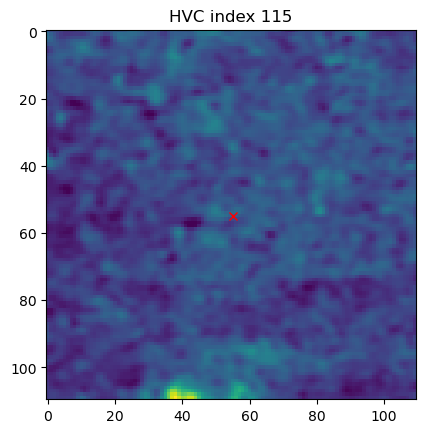

array([[1.0224609 , 0.90625   , 0.85913086, ..., 0.6972656 , 0.7050781 ,
        0.65356445],
       [1.2631836 , 1.1333008 , 0.9626465 , ..., 0.8432617 , 0.8112793 ,
        0.7067871 ],
       [1.2949219 , 1.2163086 , 1.0253906 , ..., 0.9597168 , 0.87524414,
        0.69506836],
       ...,
       [0.6813965 , 0.70410156, 0.685791  , ..., 0.5852051 , 0.5358887 ,
        0.52246094],
       [0.67163086, 0.75      , 0.7680664 , ..., 0.6357422 , 0.67749023,
        0.7324219 ],
       [0.68408203, 0.7553711 , 0.76123047, ..., 0.56030273, 0.66308594,
        0.75097656]], dtype=float32)

In [9]:
snap.crop_wcs([new_coord2, new_coord, centre_coord], collated_data_masked_HVCs["H-alpha"], True, index)

## Step 4: Isolate RMs

This can be done by simply masking the table of RM data.

6
<SkyCoord (Galactic): (l, b) in deg
    (304.61596525, -36.99781782)> <SkyCoord (Galactic): (l, b) in deg
    (306.9159652, -34.69781787)>


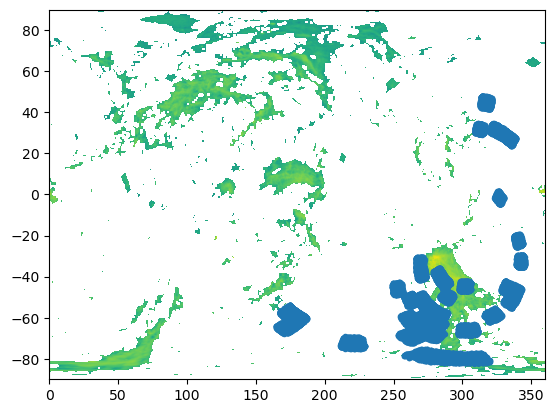

In [10]:
gal_RM_locations = collated_data_masked_HVCs["RMs"]["ra_dec_obj"].galactic
mask = list(map(lambda rm_loc: centre_coord.l < rm_loc.l < new_coord.l and centre_coord.b < rm_loc.b < new_coord.b, gal_RM_locations))
mask[0] = True
mask[1] = True
mask[2] = True
mask[6] = True
mask[20] = True
mask[34] = True

filtered = collated_data_masked_HVCs["RMs"][mask]

print(sum(mask))
print(centre_coord,new_coord)
plt.plot(gal_RM_locations.l, gal_RM_locations.b, '.')

plt.imshow(np.flip(collated_data_masked_HVCs["HI"].data), aspect='auto', extent=(0, 360, -90, 90))
plt.show()


In [11]:
from wcs import image_transform as it

pre_fg_list = []
post_fg_list = []

for entry in filtered:
    coords = entry["ra_dec_obj"].galactic
    strength = it.get_flux_at_point(collated_data_masked_HVCs["interpolation"]["interpolation"], coords)
    pre_fg_list.append(strength)

filtered.add_column(pre_fg_list, name="interpolation_raw")

filtered

ra_dec_obj,H-alpha flux [Error],H-alpha flux,faraday_depth_radmm,faraday_depth_err_radmm,interpolation_raw
"deg,deg",R,R,rad / m2,rad / m2,
SkyCoord,float32,float32,float64,float64,float64
"202.81578062778394,-16.126783338240127",0.73828125,4.9140625,5.279544100397107,0.8983063531113807,-4.059993908989179
"202.13723753511783,-18.757444354301427",0.33007812,0.91308594,-3.681539816170432,1.7020005449491504,-6.392899004456738
"204.53826899611454,-18.772884362037722",0.43945312,1.9750977,-3.449679401834384,1.8854362333546237,-8.2913695091769
"202.651565689162,-15.139715342098357",0.6796875,4.3339844,27.270780440531915,1.085612322122986,-4.546779121023112
"203.1014862483213,-14.945006101541173",0.6875,4.423828,-11.364365098076748,2.5230972710486967,-3.476606627277179
"200.83448769764018,-15.771232844731353",0.72265625,4.8125,-41.12026083799686,0.676678249292287,-4.518589218971632


In [12]:
table = collated_data_masked_HVCs["HVCs"]['SkyCoord'].galactic
mask = list(map(lambda x: x.l.value > 250 and x.l.value < 270, table))
table = collated_data_masked_HVCs["HVCs"][mask]
table

#collated_data_masked_HVCs["HVCs"][collated_data_masked_HVCs["HVCs"]["recno"]==608]

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4
G251.7-62.8+174,"41.08549876162332,-41.3166649391577",02 44 20.52,-41 19 00,174.2,1.4,79.0,136.7,20.6,0.42,2e+19,2e+18,1.8,3.2,2.7,H6,HVC 251.7-62.7+174,"P,MS_MS",Simbad,608,GHVC
G252.4-10.1+293,"112.4824104894051,-39.65054948128392",07 29 55.78,-39 39 02,293.0,1.0,86.5,235.5,22.0,0.95,4e+19,2e+18,1.7,1.4,2.0,"T,H1",HVC 252.6-10.2+284,EP,Simbad,613,GHVC
G253.3+44.1+185,"159.56932655394473,-5.558884590518593",10 38 16.64,-05 33 32,185.6,2.2,34.3,148.1,17.3,0.21,7e+18,2e+18,1.2,1.9,2.2,H2,HVC 253.3+44.0+187,"WA,P,EP",Simbad,618,GHVC
G254.9+39.7+094,"157.48499293825415,-9.60888443705413",10 29 56.40,-09 36 32,94.2,1.9,-69.2,56.7,9.6,0.14,4e+18,9e+17,1.2,3.0,2.3,H1,HVC 255.1+39.9+096,"WB,WA,P",Simbad,634,GHVC
G256.6+18.7+142,"143.34103388691113,-25.872216894066508",09 33 21.85,-25 52 20,142.9,1.9,-59.8,95.4,15.4,0.22,1e+19,1e+18,1.5,2.8,2.2,H2,HVC 256.5+18.8+143,"WB,P",Simbad,656,GHVC
G257.2+22.0+189,"146.33024222020148,-23.915828164969717",09 45 19.26,-23 54 57,189.8,1.0,-9.1,142.3,20.5,0.88,3e+19,2e+18,1.2,1.9,2.6,H3,HVC 257.2+21.9+188,"P,EP",Simbad,663,GHVC
G257.3+33.7-295,"154.8515342253411,-15.370550918273562",10 19 24.37,-15 22 14,-295.3,2.2,-473.8,-257.8,8.7,0.11,2e+18,9e+17,1.1,1.3,1.4,,,EN,Simbad,667,GHVC
G258.0+18.5+144,"144.2312004454369,-26.91416138459892",09 36 55.49,-26 54 51,144.6,1.8,-59.4,97.1,23.3,0.36,2e+19,2e+18,1.1,1.7,1.8,H1,HVC 258.1+18.8+145,"WB,P",Simbad,674,GHVC


## Step 5: Foreground corrections

In [13]:
def punch_annulus(base, inner_radius, outer_radius, centre=False):
        if not centre:
            centre = (len(base[0])/2, len(base)/2)
        
        for y in range(len(base)):
            for x in range(len(base[y])):
                if inner_radius ** 2 < ((x-centre[0]) ** 2 + (y-centre[1]) ** 2) < outer_radius ** 2:
                    base[y][x] = 0
        
        return base

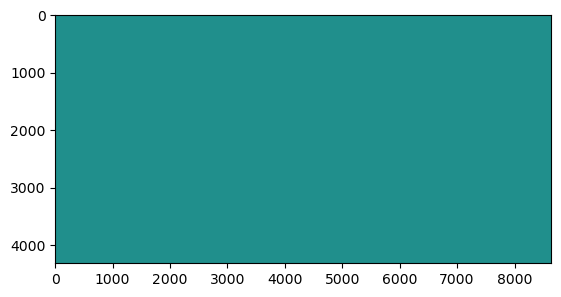

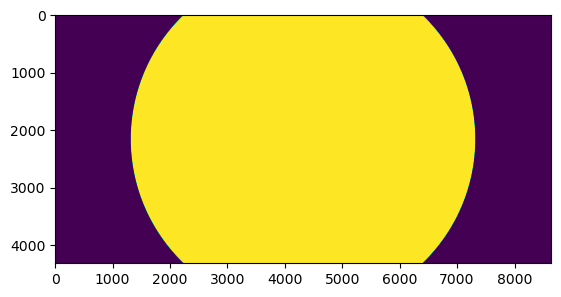

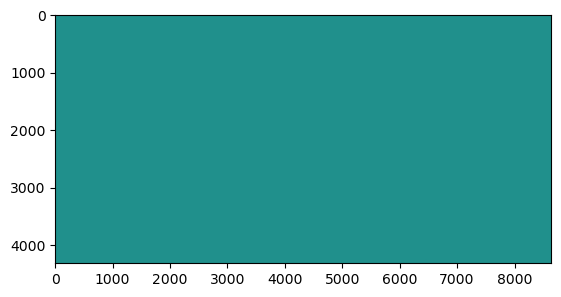

In [14]:
from collation import hvc_snapshot as snap
from foreground import foreground_remover as fgrm

# Define a scaling constant
scale = 3000

# Punch the annulus
annulus_space = (collated_data_masked_HVCs["interpolation"]["k-space"].real * 0) +1
plt.imshow(collated_data_masked_HVCs["interpolation"]["k-space"].real)
plt.show()

annulus_space = punch_annulus(annulus_space, scale, np.pi*scale)
plt.imshow(annulus_space)
plt.show()

new_k_space = annulus_space*collated_data_masked_HVCs["interpolation"]["k-space"]

plt.imshow(new_k_space.real)
plt.show()

[ 2.54443202e+08  2.23516650e+05  1.21841598e+02 ... -2.48905949e+04
  1.21841597e+02  2.23516650e+05]


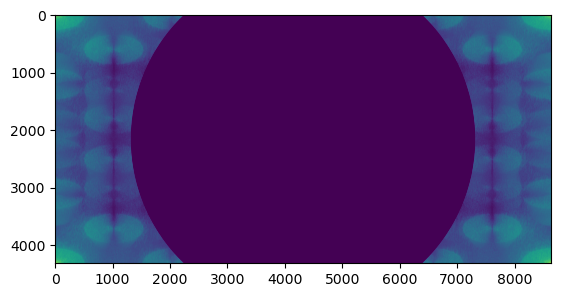

In [15]:
print(sum(collated_data_masked_HVCs["interpolation"]["k-space"].real-new_k_space.real))
plt.imshow(np.log(abs(collated_data_masked_HVCs["interpolation"]["k-space"].real-new_k_space.real)+1))
plt.show()

23462282.0
8640


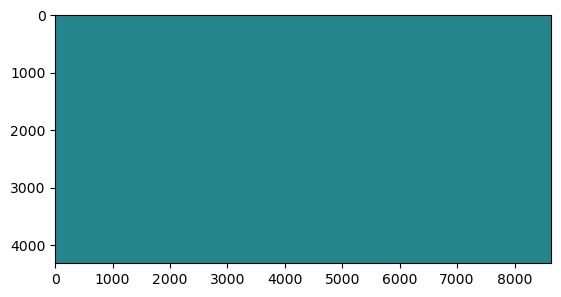

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


[5593, 1326]
[5648, 1271]


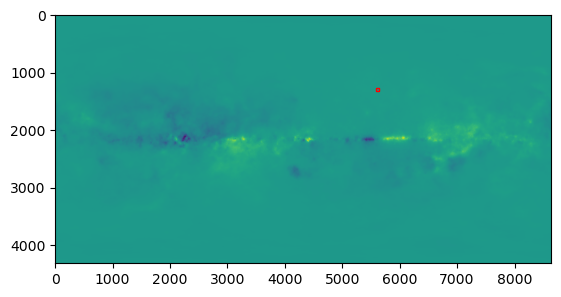

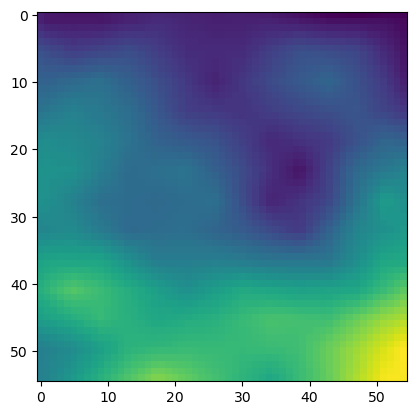

[5593, 1326]
[5648, 1271]


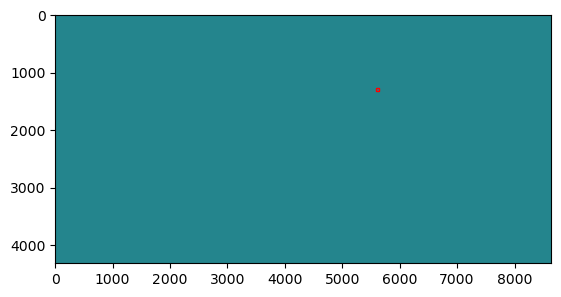

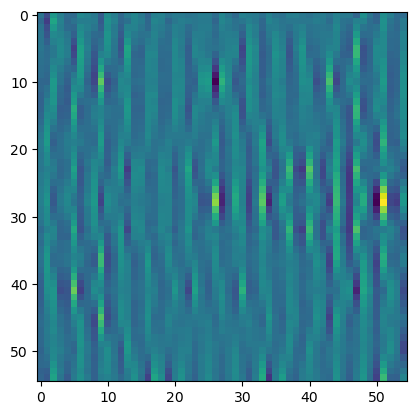

In [16]:
print(sum(sum(annulus_space)))
print(len(annulus_space[0]))

from dict2obj import Dict2Obj

corr_fg = Dict2Obj({"header":collated_data_masked_HVCs["interpolation"]["interpolation"].header, "data":fgrm.get_corrected_image(new_k_space).real})
plt.imshow(corr_fg.data)
plt.show()

snap_interp = snap.crop_wcs([centre_coord, new_coord], collated_data_masked_HVCs["interpolation"]["interpolation"], True)
snap_corr = snap.crop_wcs([centre_coord, new_coord], corr_fg, True)


## Putting it all together

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete

HVCs near RM point: 9

=== HVC SNAPSHOT ===
Gathering data ...
Cropping H-alpha
[6384, 936]
[6490, 831]


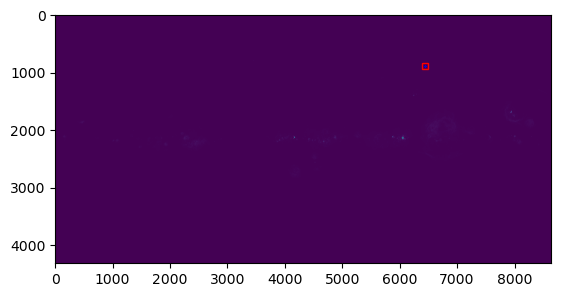

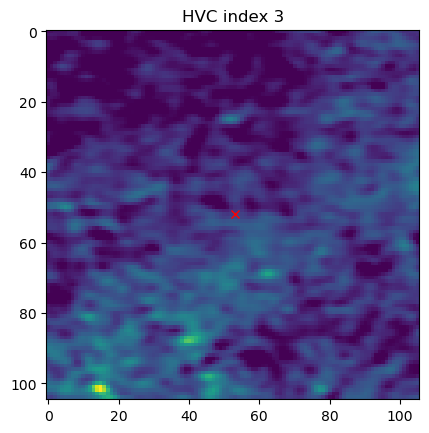

Cropping HI
[1033, 467]
[1086, 414]


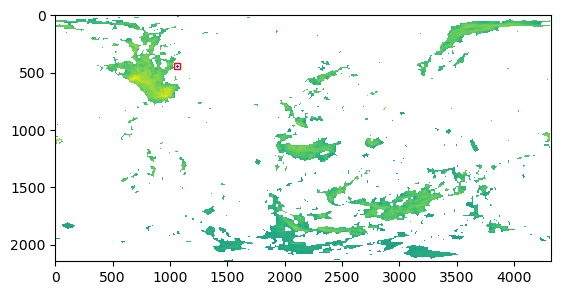

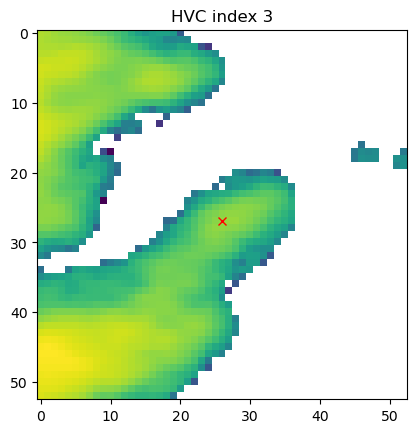

Cropping interpolation
[6384, 936]
[6490, 831]


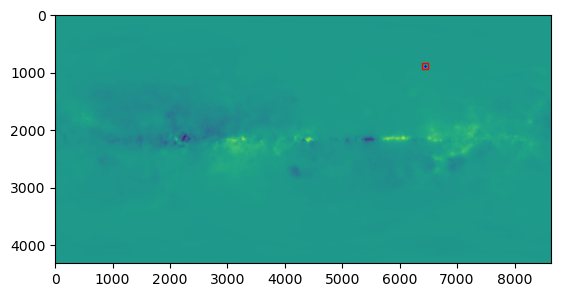

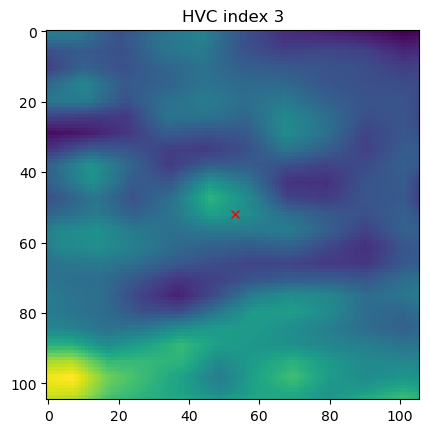

Filtering RMs
428 RM grid points found
Correcting foreground
[6384, 936]
[6490, 831]


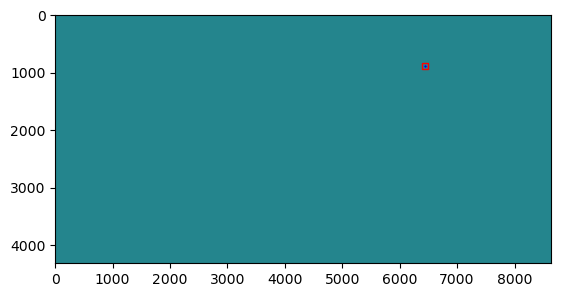

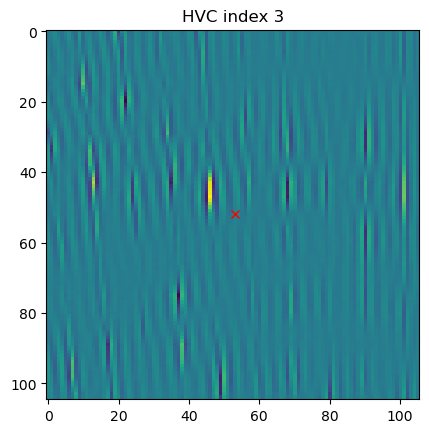

Snipping complete


In [11]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, collation_tools as ct
import numpy as np

collated_data = collator.data_whole_sky(False, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

print()

from collation import hvc_snapshot as snap

index = 3 #59 or 60
#selected_HVC = collated_data["HVCs"][collated_data["HVCs"]["Name"]=="G254.9+39.7+094"][0]#collated_data_masked_HVCs["HVCs"][index]

hvcs_filtered_RMs = ct.add_HVC_seperation(collated_data["HVCs"], max_sep=1, load_file="output.txt")
print("HVCs near RM point: "+str(len(hvcs_filtered_RMs)))
print()

snapshot = snap.take_snapshot(index, collated_data["RMs"], hvcs_filtered_RMs, collated_data["HI"], collated_data["H-alpha"], collated_data["interpolation"], plot=True)#, custom_selection=selected_HVC)

In [12]:
snapshot["RMs"]

#import matplotlib.pyplot as plt
#plt.imshow(snapshot["HI"])
#plt.show()

#snapshot["corners"]

ra_dec_obj,H-alpha flux [Error],H-alpha flux,faraday_depth_radmm,faraday_depth_err_radmm,interpolation_raw,interpolation_cor,interpolation_unc
"deg,deg",R,R,rad / m2,rad / m2,,,
SkyCoord,float32,float32,float64,float64,float64,float64,float64
"42.902191047514336,-55.01477420883195",1.2109375,0.1000061,17.67769239770644,0.4288216071308438,19.372422349773277,-0.0013479347543022158,5.5625338764009955
"42.903698108272025,-55.018734020258684",1.2109375,0.1000061,16.176559463968523,1.8789169952106561,19.372422349773277,-0.0013479347543022158,5.5625338764009955
"44.86536790327216,-54.01358820001671",1.2734375,0.7631836,20.149747328697757,1.0592403687184964,19.691441471674583,0.0025233964224420217,5.973022479837245
"42.9317322623515,-54.97675698883515",1.2109375,0.13146973,19.359882846095875,0.12217530821255418,19.085099870569504,0.005986309982390953,5.470733660110953
"42.933254285578194,-54.98204035424923",1.2109375,0.1000061,19.792675963526964,0.27329349985299084,19.228761110171217,-0.0077226288973232995,5.516633768255918
"44.44678109681912,-53.50218566172738",1.2421875,0.4564209,15.862374598335851,1.8413754602455343,18.529676612561822,-0.0015359423248617618,6.366530368992449
"43.48611077185344,-55.74456413040774",1.2109375,0.1000061,17.582310536163302,2.656890456377741,18.230172506212885,-0.006547296132378335,5.292776226177268
"42.698913400821226,-54.91802589645858",1.2109375,0.1000061,13.174927374801996,1.3013094718859126,19.301628924660783,-0.001185834885369674,5.635051618432332


# Bug testing

In [19]:
# Collate data
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator
import numpy as np

collated_data_masked_HVCs = collator.data_whole_sky(False, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")
collated_data_large_HVCs = collator.data_whole_sky(False, hvc_area_range=(np.pi, 50), load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")
collated_data_all_HVCs = collator.data_whole_sky(False, full_hvc_range=True, load_data="../data_processed/proc_rms", h1_img="../data_catalog/hi4pi-hvc-nhi-ait.fits")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


## RM and foreground spread

In [3]:
from wcs import image_transform as it

filtered = collated_data_masked_HVCs['RMs']

pre_fg_list = []
post_fg_list = []

for entry in filtered:
    coords = entry["ra_dec_obj"].galactic
    strength = it.get_flux_at_point(collated_data_masked_HVCs["interpolation"]["interpolation"], coords)
    unc = it.get_flux_at_point(collated_data_masked_HVCs["interpolation"]['error'], coords)
    pre_fg_list.append(strength)
    post_fg_list.append(unc)

filtered.add_column(pre_fg_list, name="interpolation_raw")
filtered.add_column(post_fg_list, name="interpolation_err")

filtered

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


ra_dec_obj,H-alpha flux [Error],H-alpha flux,faraday_depth_radmm,faraday_depth_err_radmm,interpolation_raw,interpolation_err
"deg,deg",R,R,rad / m2,rad / m2,,
SkyCoord,float32,float32,float64,float64,float64,float64
"202.81578062778394,-16.126783338240127",0.73828125,4.9140625,5.279544100397107,0.8983063531113807,-4.059993908989179,5.225696471726144
"202.13723753511783,-18.757444354301427",0.33007812,0.91308594,-3.681539816170432,1.7020005449491504,-6.392899004456738,4.982720888901469
"204.53826899611454,-18.772884362037722",0.43945312,1.9750977,-3.449679401834384,1.8854362333546237,-8.2913695091769,5.877846565980126
"205.10093689639805,-15.340573246612612",0.69921875,4.513672,9.254418480973383,0.8814660181756719,-2.9221550021648968,5.744841545553271
"205.12571716967923,-15.779570732782277",0.6796875,4.310547,-5.460015885116435,1.3001189432362714,-3.996524505184651,5.441304806299076
"201.59252934889648,-19.929189688189737",0.33789062,0.9934082,-4.680838232310652,1.690857426456872,-7.442646204733692,5.257704606748403
"202.651565689162,-15.139715342098357",0.6796875,4.3339844,27.270780440531915,1.085612322122986,-4.546779121023112,5.279136149669732
"205.08387755755746,-16.126117633806565",0.48632812,2.3554688,1.98672771208837,1.3863145526991953,-3.2318704508684806,5.366831307095721


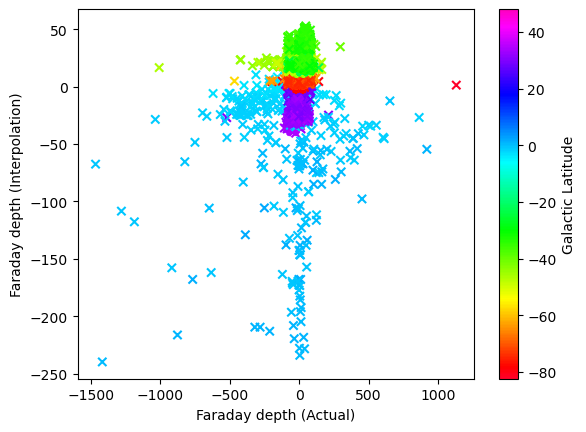

In [18]:
import matplotlib.pyplot as plt

#plt.errorbar(filtered['faraday_depth_radmm'], filtered['interpolation_raw'], fmt='bx')#, xerr=filtered['faraday_depth_err_radmm'], yerr=filtered['interpolation_err'], ecolor = "black")
#plt.xlabel("Faraday depth (Actual)")
#plt.ylabel("Faraday depth (Interpolation)")
#plt.show()

#plt.errorbar(filtered['faraday_depth_radmm'], filtered['interpolation_raw'], fmt='bx', xerr=filtered['faraday_depth_err_radmm'], yerr=filtered['interpolation_err'], ecolor = "black")
#plt.xlabel("Faraday depth (Actual)")
#plt.ylabel("Faraday depth (Interpolation)")
#plt.show()

b_list = filtered['ra_dec_obj'].galactic.b

colormap = plt.colormaps["gist_rainbow"]

scatter = plt.scatter(filtered['faraday_depth_radmm'], filtered['interpolation_raw'], marker='x', c=b_list, cmap=colormap)#colors)#, xerr=filtered['faraday_depth_err_radmm'], yerr=filtered['interpolation_err'], ecolor = "black")
plt.colorbar(scatter, label="Galactic Latitude")
plt.xlabel("Faraday depth (Actual)")
plt.ylabel("Faraday depth (Interpolation)")
plt.show()

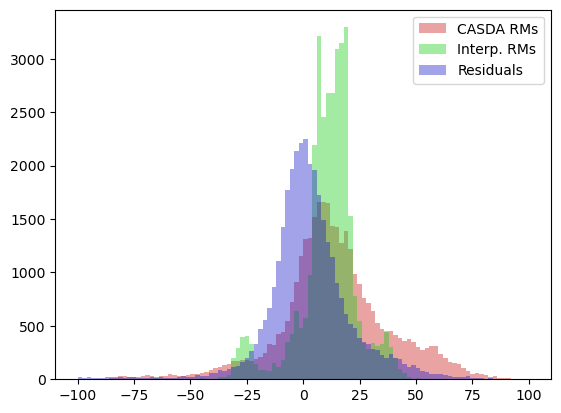

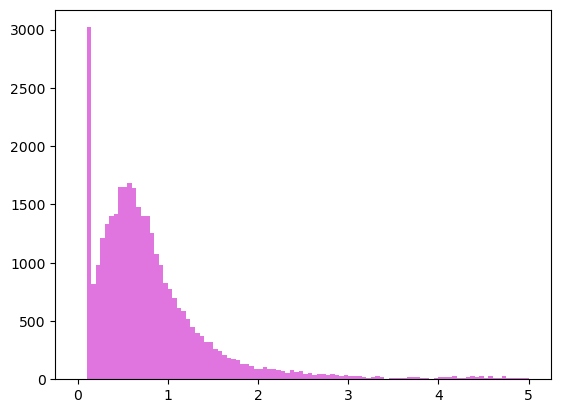

In [3]:
import matplotlib.pyplot as plt

bounds = (-100, 100)

plt.hist(filtered['faraday_depth_radmm'], 100, bounds, label="CASDA RMs", color=[0.8, 0.1, 0.1, 0.4])
plt.hist(filtered['interpolation_raw'], 100, bounds, label="Interp. RMs", color=[0.1, 0.8, 0.1, 0.4])
plt.hist(filtered['faraday_depth_radmm']-filtered['interpolation_raw'], 100, bounds, label="Residuals", color=[0.1, 0.1, 0.8, 0.4])
plt.legend()
plt.show()

plt.hist(filtered['H-alpha flux'], 100, (0, 5), label="H-alpha", color=[0.8, 0.1, 0.8, 0.6])
plt.show()

## HVC Selection via RM Prescence

In [5]:
from astropy import coordinates

l = len(collated_data_masked_HVCs['HVCs']) - 1
lr = len(collated_data_masked_HVCs['RMs']) - 1
row = 0
row2 = 0
val = 0

sep_arr = []

for hvc in collated_data_masked_HVCs['HVCs']:
    val = int(row/l*100)
    row2 = 0

    minimum = -1
    for rm in collated_data_masked_HVCs['RMs']:
        new = hvc['SkyCoord'].separation(rm['ra_dec_obj'])
        if minimum == -1 or minimum > new:
            minimum = new
        
        row2 = row2 + 1
        print("RM loop: "+str(int(row2/lr*100))+"%; HVC loop: "+str(val)+"% \r", sep="", end="", flush=True)

    sep_arr.append(minimum)

    print("RM loop: 100%; HVC loop: "+str(val)+"% \r", sep="", end="", flush=True)
    row = row + 1

with open("output.txt", "w") as txt_file:
    for line in sep_arr:
        txt_file.write(str(line)+"\n")

In [4]:
print(sep_arr)

[<Angle 18.28375396 deg>]


In [36]:
from astropy.coordinates import Angle
import copy

sep_arr = []

with open("output.txt", "r") as txt_file:
    sep_arr = txt_file.read().split("\n")[:-1]

sep_arr = list(map(Angle, sep_arr))

hvcs = copy.deepcopy(collated_data_masked_HVCs['HVCs'])

hvcs.add_column(sep_arr, name="Nearest RM")

hvcs = hvcs[hvcs["Nearest RM"].value < 2*np.pi]

hvcs

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat,Nearest RM
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,,deg
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4,float64
G171.5-53.7-236,"39.21299375466197,-1.1277762416132988",02 36 51.12,-01 07 40,-236.9,1.0,-217.8,-199.4,22.1,1.03,4e+19,2e+18,1.5,2.6,1.4,H1,HVC 171.0-53.6-237,"ACVHV_ACVHV,EN,MS_MS",Simbad,445,GHVC,1.0103705736416666
G244.0-71.8-109,"31.85799789014355,-35.187777007119124",02 07 25.92,-35 11 16,-109.3,1.0,-170.8,-76.8,27.6,1.96,1e+20,3e+18,2.2,3.0,2.8,"T,H1",,"N,MS_MS",Simbad,558,GHVC,4.124423258622222
G245.5-59.5+200,"46.458581619885905,-39.48888662326427",03 05 50.06,-39 29 20,200.0,2.5,98.6,162.5,21.3,0.23,9e+18,2e+18,1.1,2.6,2.2,H2,HVC 245.0-59.4+194,"P,MS_MS",Simbad,564,GHVC,4.732537968475
G251.7-62.8+174,"41.08549876162332,-41.3166649391577",02 44 20.52,-41 19 00,174.2,1.4,79.0,136.7,20.6,0.42,2e+19,2e+18,1.8,3.2,2.7,H6,HVC 251.7-62.7+174,"P,MS_MS",Simbad,608,GHVC,2.6442725931
G261.5-34.5+237,"80.51641498466985,-53.96443940870481",05 22 03.94,-53 57 52,237.0,2.7,57.8,194.5,26.6,0.28,6e+18,3e+18,1.5,2.6,2.0,H1,HVC 261.5-34.6+237,"P,MS_MS,EP",Simbad,722,GHVC,3.927330190036111
G261.6-44.9+234,"63.26708320189381,-52.70916286681139",04 13 04.10,-52 42 33,234.7,11.5,80.6,197.2,30.0,0.07,3e+18,3e+18,1.3,2.2,1.5,,,"P,MS_MS",Simbad,723,GHVC,3.347268266672222
G262.4-26.2+143,"94.79587147051343,-54.00693872468238",06 19 11.01,-54 00 25,143.6,1.9,-52.0,101.1,19.5,0.28,1e+19,2e+18,1.6,3.1,2.6,H1,HVC 261.8-26.0+148,"P,MS_MS",Simbad,729,GHVC,5.717798709227778
G264.6-53.3+224,"49.38550058849787,-51.554164115992066",03 17 32.52,-51 33 15,224.2,2.2,93.3,186.7,22.6,0.28,1e+19,2e+18,1.7,2.6,2.7,H4,CHVC 264.8-53.3+222,"P,MS_MS",Simbad,749,GHVC,0.08026122106666667


In [5]:
from collation import collation_tools as colt

good_HVCs = colt.add_HVC_seperation(collated_data_masked_HVCs['HVCs'], load_file="output.txt")

example_HVC = good_HVCs[0]

example_HVC

Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat,Nearest RM
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,,deg
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,str26,str22,str6,int32,str4,float64
G171.5-53.7-236,"39.21299375466197,-1.1277762416132988",02 36 51.12,-01 07 40,-236.9,1.0,-217.8,-199.4,22.1,1.03,4e+19,2e+18,1.5,2.6,1.4,H1,HVC 171.0-53.6-237,"ACVHV_ACVHV,EN,MS_MS",Simbad,445,GHVC,1.0103705736416666


## More RM vs Interpolation analysis

In [20]:
collated_data_masked_HVCs['RMs']['']



KeyError: 'interpolation_raw'